In [1]:
import glob
import os
from tqdm import tqdm
from pathlib import Path
import pke
import logging
logging.getLogger().setLevel(logging.ERROR)

from config import Config
from risk_detection.preprocessing.report_parser import report_info_from_risk_path
from risk_detection.analysis.keyword_extraction import Keywords

In [2]:
path = r'C:\machine_learning\10K-emerging-risk-detection\data\risk_section\1750\2006-05-31_2006-07-17_0001104659-06-047248.txt'
pt = Path(path)
report_info = report_info_from_risk_path(pt)

In [6]:
extractor = pke.unsupervised.YAKE()
extractor.load_document(input=path, language='en', normalization=None)
extractor.candidate_selection(n=3)

window = 2
use_stems = True  # use stems instead of words for weighting
extractor.candidate_weighting(window=window, use_stems=use_stems)
threshold = 0.8
keyphrases = extractor.get_n_best(n=30, threshold=threshold)

In [41]:
keyphrases

[('results of operations', 0.0009902788192668911),
 ('operations and financial', 0.001364122768959137),
 ('affect our results', 0.0020399822900483565),
 ('financial condition', 0.0033782508362694666),
 ('aircraft and engines', 0.003999362580824986),
 ('condition and results', 0.006657722062277916),
 ('may', 0.0067954384332795425),
 ('products and services', 0.007756188152973926),
 ('could adversely affect', 0.007790747760733392),
 ('financial', 0.007966803403555813),
 ('adversely affect', 0.009327676754816496),
 ('affect our financial', 0.009741799674724312),
 ('may adversely affect', 0.010116254945600006),
 ('may be adversely', 0.010867430715092536),
 ('department of defense', 0.011146423329716429),
 ('condition', 0.011312220239198695),
 ('aviation industry', 0.012127538463836645),
 ('operations', 0.013090894049952579),
 ('results', 0.013747947696047529),
 ('aircraft', 0.01465665062831239),
 ('could adversely', 0.017160922974393387),
 ('adversely', 0.01770902713029072),
 ('industry', 

In [39]:
pos = {'NOUN', 'PROPN', 'ADJ'}

# 1. create a TextRank extractor.
text_rank = pke.unsupervised.TextRank()

# 2. load the content of the document.
text_rank.load_document(input=path,
                        language='en',
                        normalization=None)

text_rank.candidate_weighting(window=2,
                              pos=pos,
                              top_percent=0.70)
keyphrases_text_rank_2 = text_rank.get_n_best(n=100)

In [20]:
[k for k, _ in keyphrases_text_rank]

['other aircraft',
 'competitive airframe maintenance market',
 'future environmental requirements',
 'aircraft maintenance',
 'future environmental claims',
 'aircraft parts',
 'environmental capital',
 'lease aircraft',
 'new aircraft',
 'significant capital',
 'licensed aircraft',
 'generation aircraft',
 'other aviation',
 'environmental requirements',
 'additional risks',
 'aircraft',
 'additional impairment',
 'worldwide airline customers',
 'environmental claims',
 'other activities',
 'financial obligations',
 'environmental protection',
 'working capital',
 'additional charge',
 'future impairment',
 'significant government',
 'airframe maintenance',
 'maintenance activities',
 'more additional',
 'financial plan',
 'present sales levels',
 'competitive industry',
 'potential customers',
 'regulatory requirements',
 'worldwide economic',
 'government customers',
 'material adverse effect',
 'future cash',
 'future terrorist',
 'aviation industry',
 'united airlines',
 'u.s.-ba

In [42]:
[key for key, _ in keyphrases_text_rank_2]

['other aircraft spare parts distributors',
 'competitive airframe maintenance market',
 'future environmental requirements',
 'aircraft maintenance',
 'aircraft parts manufacturers',
 'future environmental claims',
 'environmental capital investment',
 'lease aircraft',
 'significant capital expenditures',
 'new aircraft',
 'aircraft service companies',
 'qualified licensed aircraft',
 'older generation aircraft',
 'other aviation product',
 'extensive environmental requirements',
 'aircraft operating',
 'aircraft manufacturers',
 'other loan agreements',
 'additional impairment charges',
 'ongoing military logistic support activities',
 'prospective worldwide airline customers',
 'environmental requirements',
 'significant government regulation',
 'additional risks',
 'more additional periods',
 'minimum working capital',
 'aircraft',
 'future impairment charges',
 'airframe maintenance bays',
 'airframe maintenance facility',
 'environmental claims',
 'other activities',
 'overall e

In [32]:
topic_rank = pke.unsupervised.TopicRank()

topic_rank.load_document(input=path)

pos = {'NOUN', 'PROPN', 'ADJ'}
topic_rank.candidate_selection(pos=pos)

topic_rank.candidate_weighting(threshold=0.35)
keyphrases = extractor.get_n_best(n=30)
print(keyphrases)

[('results of operations', 0.0009902788192668911), ('operations and financial', 0.001364122768959137), ('affect our results', 0.0020399822900483565), ('financial condition', 0.0033782508362694666), ('aircraft and engines', 0.003999362580824986), ('condition and results', 0.006657722062277916), ('may', 0.0067954384332795425), ('products and services', 0.007756188152973926), ('could adversely affect', 0.007790747760733392), ('financial', 0.007966803403555813), ('adversely affect', 0.009327676754816496), ('affect our financial', 0.009741799674724312), ('may adversely affect', 0.010116254945600006), ('may be adversely', 0.010867430715092536), ('department of defense', 0.011146423329716429), ('condition', 0.011312220239198695), ('aviation industry', 0.012127538463836645), ('operations', 0.013090894049952579), ('results', 0.013747947696047529), ('aircraft', 0.01465665062831239), ('could adversely', 0.017160922974393387), ('adversely', 0.01770902713029072), ('industry', 0.018157237419372585),

In [9]:
pos = {'NOUN', 'PROPN', 'ADJ'}

# 1. create a SingleRank extractor.
single_rank = pke.unsupervised.SingleRank()

# 2. load the content of the document.
single_rank.load_document(input=path)

# 3. select the longest sequences of nouns and adjectives as candidates.
single_rank.candidate_selection(pos=pos)

# 4. weight the candidates using the sum of their word's scores that are
#    computed using random walk. In the graph, nodes are words of
#    certain part-of-speech (nouns and adjectives) that are connected if
#    they occur in a window of 10 words.
single_rank.candidate_weighting(window=10, pos=pos)

# 5. get the 10-highest scored candidates as keyphrases
single_rank_keys = extractor.get_n_best(n=30)

In [10]:
single_rank_keys

[('results of operations', 0.0009902788192668911),
 ('operations and financial', 0.001364122768959137),
 ('affect our results', 0.0020399822900483565),
 ('financial condition', 0.0033782508362694666),
 ('aircraft and engines', 0.003999362580824986),
 ('condition and results', 0.006657722062277916),
 ('may', 0.0067954384332795425),
 ('products and services', 0.007756188152973926),
 ('could adversely affect', 0.007790747760733392),
 ('financial', 0.007966803403555813),
 ('adversely affect', 0.009327676754816496),
 ('affect our financial', 0.009741799674724312),
 ('may adversely affect', 0.010116254945600006),
 ('may be adversely', 0.010867430715092536),
 ('department of defense', 0.011146423329716429),
 ('condition', 0.011312220239198695),
 ('aviation industry', 0.012127538463836645),
 ('operations', 0.013090894049952579),
 ('results', 0.013747947696047529),
 ('aircraft', 0.01465665062831239),
 ('could adversely', 0.017160922974393387),
 ('adversely', 0.01770902713029072),
 ('industry', 

In [3]:
keywords = {}
for risk_file in tqdm(glob.glob(os.path.join(Config.risk_dir(), '1800', '*.txt'))):
    with open(risk_file, encoding='utf-8') as f:
        doc = f.read()
    pos = {'NOUN', 'PROPN', 'ADJ'}
    extractor = pke.unsupervised.TextRank()
    extractor.load_document(input=doc, language='en', normalization=None)
    extractor.candidate_weighting(window=2,
                                  pos=pos,
                                  top_percent=0.50)
    keyphrases_text_rank = extractor.get_n_best(n=100)
    report_info = report_info_from_risk_path(Path(risk_file))
    keywords[risk_file] = Keywords([key for key, _ in keyphrases_text_rank], report_info)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [04:13<00:00, 21.10s/it]


In [3]:
keywords

{'c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1800\\2005-12-31_2006-02-22_0001047469-06-002258.txt': <risk_detection.analysis.keyword_extraction.Keywords at 0x1fc62917e20>,
 'c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1800\\2006-12-31_2007-02-23_0001104659-07-013496.txt': <risk_detection.analysis.keyword_extraction.Keywords at 0x1fc5fc72250>,
 'c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1800\\2007-12-31_2008-02-19_0001047469-08-001480.txt': <risk_detection.analysis.keyword_extraction.Keywords at 0x1fc5ba32700>,
 'c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1800\\2008-12-31_2009-02-20_0001047469-09-001642.txt': <risk_detection.analysis.keyword_extraction.Keywords at 0x1fc11cc0910>,
 'c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1800\\2009-12-31_2010-02-19_0001047469-10-001018.txt': <risk_detection.analysis.keyword_extraction.Keywords at 0x1fc11e11fd0>,


In [4]:
keys = keywords['c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1800\\2005-12-31_2006-02-22_0001047469-06-002258.txt']
next_keys = keywords['c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1800\\2006-12-31_2007-02-23_0001104659-07-013496.txt']

In [5]:
print(f'All keywords: {keys.keywords}')
print()
print(f'Negative keywords: {keys.get_negative_keywords()}')

All keywords: ['other regulatory requirements', 'significant adverse regulatory', 'other regulatory authorities', 'health care products', 'other intellectual property protection', 'health care cost trend rate', 'foreign regulatory requirements', 'state health care programs', 'other intellectual property infringement', 'different regulatory requirements', 'product liability costs', 'regulatory protection', 'future pre - market clearances', 'regulatory requirements', 'product liability claims', 'new products', 'new product', 'manufacturing products', 'medical products', 'regulatory authorities', 'veterans health care', 'foreign medical reimbursement', 'other multinational companies', 'veterans administration health programs', 'abbott products', 'abbott product', 'product requirements', 'future products', 'substantial additional costs', 'other factors', 'significant safety', 'health care', 'significant manufacturing', 'cost - effective basis', 'other companies', 'product pricing', 'produc

In [63]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

# Keywords for 2005-12-31 2006-02-22 report

In [83]:
cloud = WordCloud(width = 3000, height = 2000, random_state=1,
                  background_color='white').generate_from_frequencies(Counter(keys.keywords))
neg_cloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      background_color='white').generate_from_frequencies(Counter(keys.get_negative_keywords()))

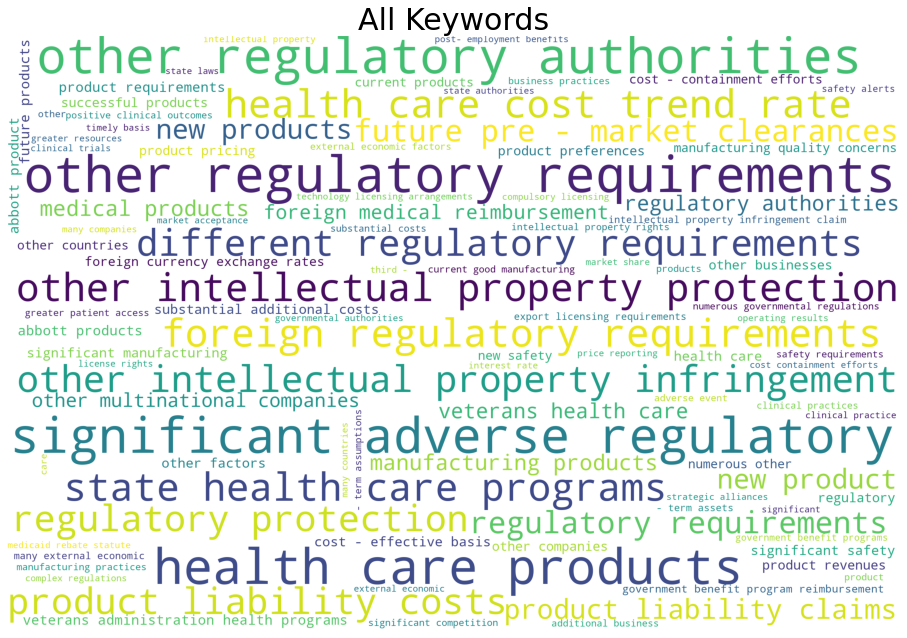

In [87]:
fig = plt.figure(figsize=(16,14))
plt.imshow(cloud)
plt.title('All Keywords', fontsize=30)
plt.axis("off")
plt.show()

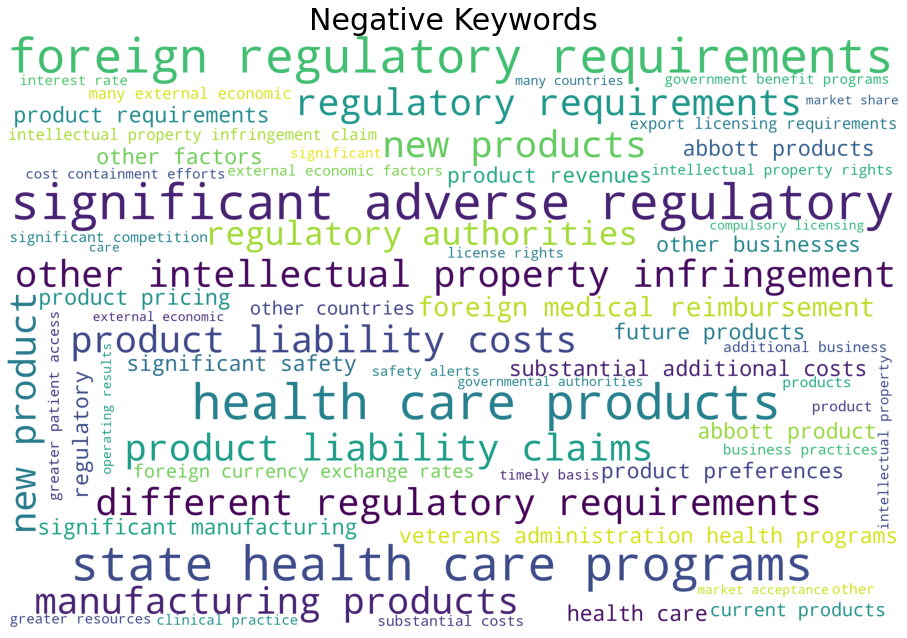

In [88]:
fig = plt.figure(figsize=(16,14))
plt.imshow(neg_cloud)
plt.title('Negative Keywords', fontsize=30)
plt.axis("off")
plt.show()

# Keywords for 2006-12-31 2007-02-23 report

In [97]:
next_cloud = WordCloud(width = 3000, height = 2000, random_state=1,
                       background_color='white').generate_from_frequencies(Counter(next_keys.keywords))
next_neg_cloud = WordCloud(width = 3000, height = 2000, random_state=1,
                           background_color='white').generate_from_frequencies(Counter(next_keys.get_negative_keywords()))

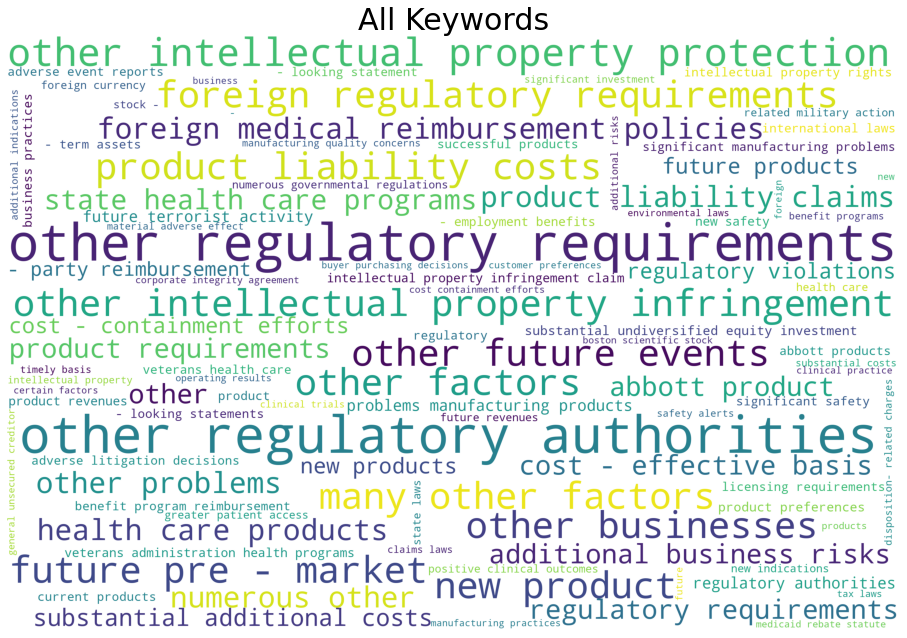

In [98]:
fig = plt.figure(figsize=(16,14))
plt.imshow(next_cloud)
plt.title('All Keywords', fontsize=30)
plt.axis("off")
plt.show()

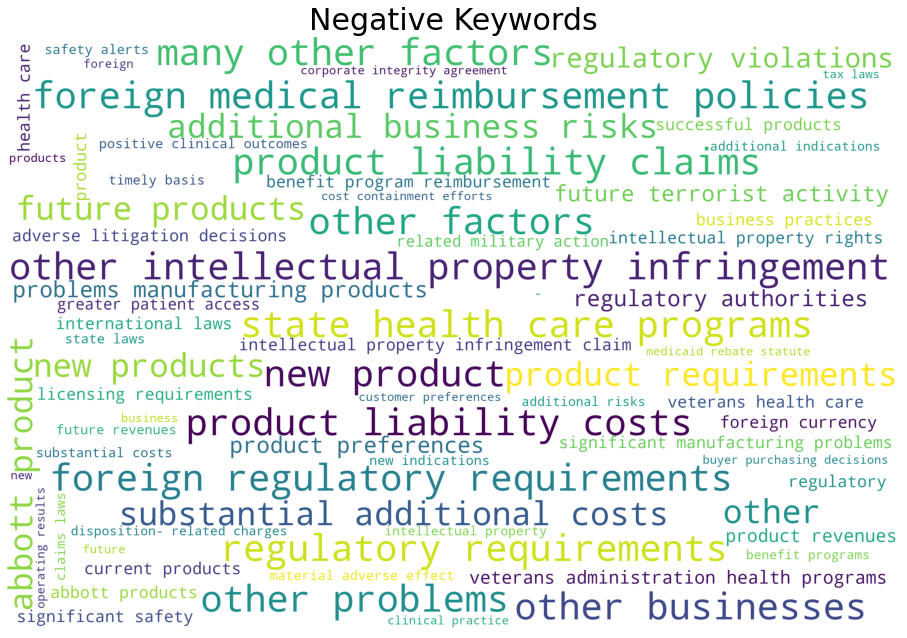

In [99]:
fig = plt.figure(figsize=(16,14))
plt.imshow(next_neg_cloud)
plt.title('Negative Keywords', fontsize=30)
plt.axis("off")
plt.show()

In [102]:
set(next_keys.get_negative_keywords()).difference(set(keys.get_negative_keywords()))

{'-',
 'additional business risks',
 'additional indications',
 'additional risks',
 'adverse litigation decisions',
 'benefit program reimbursement',
 'benefit programs',
 'business',
 'buyer purchasing decisions',
 'claims laws',
 'corporate integrity agreement',
 'customer preferences',
 'disposition- related charges',
 'foreign',
 'foreign currency',
 'foreign medical reimbursement policies',
 'future',
 'future revenues',
 'future terrorist activity',
 'international laws',
 'licensing requirements',
 'many other factors',
 'material adverse effect',
 'medicaid rebate statute',
 'new',
 'new indications',
 'other problems',
 'positive clinical outcomes',
 'problems manufacturing products',
 'regulatory violations',
 'related military action',
 'significant manufacturing problems',
 'state laws',
 'successful products',
 'tax laws',
 'veterans health care'}

In [103]:
n_n_keys = keywords['c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1800\\2007-12-31_2008-02-19_0001047469-08-001480.txt']

In [107]:
set(n_n_keys.get_negative_keywords()).difference(set(next_keys.get_negative_keywords()))

{'actual value',
 'business operations',
 'competitive products',
 'contingent liabilities such',
 'foreign currency exchange',
 'foreign medical reimbursement',
 'foreign operations',
 'governmental consent decree',
 'limited commercial success',
 'market value',
 'safety concerns',
 'significant',
 'successful new products'}

'c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1800\\2005-12-31_2006-02-22_0001047469-06-002258.txt'

In [137]:
risk_files = glob.glob(os.path.join(Config.risk_dir(), '1800', '*.txt'))
keywords_1 = {}
for risk_file in tqdm(risk_files[:1]):
    with open(risk_file, encoding='utf-8') as f:
        doc = f.read()
    pos = {'NOUN', 'PROPN', 'ADJ'}
    extractor = pke.unsupervised.TextRank()
    extractor.load_document(input=doc, language='en', normalization=None)
    extractor.candidate_weighting(window=2,
                                  pos=pos,
                                  top_percent=0.30)
    keyphrases_text_rank = extractor.get_n_best(n=100)
    report_info = report_info_from_risk_path(Path(risk_file))
    keywords_1[report_info] = Keywords([key for key, _ in keyphrases_text_rank], report_info)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.48s/it]


In [138]:
k = list(keywords_1.keys())

In [139]:
keywords_1[k[0]].keywords

['other regulatory requirements',
 'significant adverse regulatory',
 'other regulatory authorities',
 'health care products',
 'foreign regulatory requirements',
 'state health care programs',
 'product liability costs',
 'regulatory protection',
 'regulatory requirements',
 'health care cost',
 'product liability claims',
 'new products',
 'new product',
 'manufacturing products',
 'medical products',
 'regulatory authorities',
 'foreign medical reimbursement',
 'abbott products',
 'abbott product',
 'product requirements',
 'future products',
 'substantial additional costs',
 'other factors',
 'significant safety',
 'health care',
 'significant manufacturing',
 'other companies',
 'administration health programs',
 'regulatory',
 'new safety',
 '- term assets',
 'cost - containment',
 'property protection',
 'manufacturing practices',
 'clinical practices',
 'products',
 'product',
 'safety requirements',
 'manufacturing quality',
 'other',
 '- market',
 'business practices',
 'addi

In [140]:
import string
tfidf = pke.unsupervised.TfIdf()

tfidf.load_document(input=risk_files[0], language='en', normalization=None)

# 3. select {1-3}-grams not containing punctuation marks as candidates.
tfidf.candidate_selection(n=3, stoplist=list(string.punctuation))

# 4. weight the candidates using a `tf` x `idf`
df = pke.load_document_frequency_file(input_file='path/to/df.tsv.gz')
extractor.candidate_weighting(df=df)

# 5. get the 10-highest scored candidates as keyphrases
keyphrases = extractor.get_n_best(n=10)

'c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1800\\2005-12-31_2006-02-22_0001047469-06-002258.txt'

In [6]:
a = keywords['c:\\machine_learning\\10k-emerging-risk-detection\\data\\risk_section\\1001902\\2011-12-31_2012-02-21_0001193125-12-070380.txt']

In [8]:
a.keywords

['future effective tax rate',
 'other business disruptions',
 'technology products such',
 'disk manufacturing products',
 'products cost -',
 'significant tax benefits',
 'new capital equipment such',
 'other market',
 'other storage technologies',
 'future customer requirements',
 'cost effective products',
 'such enhanced products',
 'other business',
 'lower income tax rate',
 'new government contracts',
 'new manufacturing systems',
 'such products',
 'various u.s. government programs',
 'advanced new products',
 'u.s. government contracts',
 '- year government programs',
 'other natural disaster',
 'other electronics devices',
 'u.s. government revenue',
 'other proprietary rights',
 'other legal rights',
 'various other countries',
 'federal deferred tax assets',
 'other employees',
 'new products',
 'effective tax rate',
 'future patent applications',
 'other resources',
 'other local businesses',
 'other terms',
 'other disruptions',
 'future income',
 'u.s. government agencie

# Keyword clustering attempt

In [6]:
import time
import hdbscan
import umap
import umap.plot
umap.plot.output_notebook()
import numpy as np
from top2vec import Top2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import sklearn.cluster as cluster

import seaborn as sns
import matplotlib.pyplot as plt

Loading BokehJS ...

In [7]:
topic_model = Top2Vec.load(os.path.join(Config.top2vec_models_dir(), 'top2vec_model_with_doc_ids'))

In [8]:
doc_model = topic_model.model

In [9]:
embs = [doc_model.infer_vector(k.split()) for k in keys.keywords]
emb_arr = np.stack(embs, axis=0)

In [241]:
umap_model = umap.UMAP(n_neighbors=4, n_components=5, metric='cosine')# metric='euclidean',)
clustering = hdbscan.HDBSCAN(min_cluster_size=4, allow_single_cluster=True, )# cluster_selection_epsilon=0.5)

In [268]:
umap_model.fit(emb_arr)
clusters = clustering.fit(umap_model.embedding_)
clusters.labels_

array([ 2,  2,  0,  6,  4,  6,  2,  6,  4,  2,  1,  4,  3,  2,  1,  1,  1,
        3,  6,  0, -1,  6,  5,  1,  7,  7,  2,  1,  1, -1,  0,  6,  3,  5,
        1,  3,  1,  2,  3,  1,  1,  5,  1,  1,  5,  5,  3,  0,  6,  4, -1,
        3, -1,  5,  4,  3,  3,  1,  1,  0, -1,  1,  3,  3,  3,  3,  1,  1,
        3,  7,  3,  6,  0, -1,  3,  5,  4,  7,  5,  1,  4,  1,  3,  3,  7,
       -1,  3,  3,  4,  0,  5, -1,  0,  0, -1,  1,  1,  6,  1,  5],
      dtype=int64)

In [270]:
np.array(keys.keywords)[clusters.labels_ == 1]

array(['product liability costs', 'product liability claims',
       'new products', 'new product',
       'veterans administration health programs', 'future products',
       'substantial additional costs', 'other companies',
       'product preferences', 'product revenues', 'successful products',
       'cost - containment efforts', 'current products', 'products',
       'product', 'other', 'additional business', 'substantial costs',
       'strategic alliances', 'cost containment efforts', 'market share',
       'market acceptance', 'operating results'], dtype='<U40')

In [247]:
good_emb = umap_model.embedding_

In [202]:
p = umap.plot.interactive(umap_model, labels=cluster.labels_)
umap.plot.show(p)

ValueError: Plotting is currently only implemented for 2D embeddings

In [261]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(emb_arr)

<AxesSubplot:>

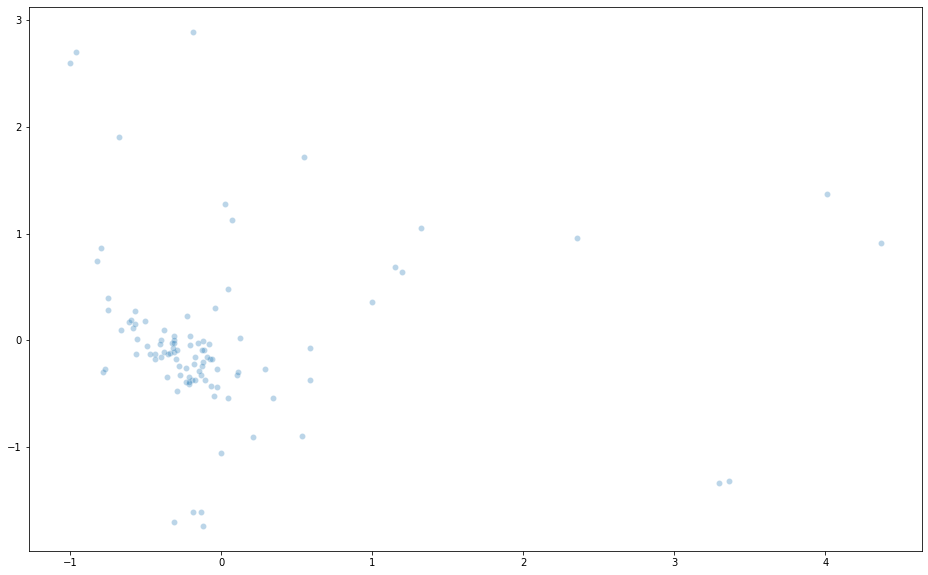

In [262]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1],
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)

In [173]:
tsne = TSNE(n_components=2, verbose=1, perplexity=70, n_iter=5000, metric='cosine')
tsne_results = tsne.fit_transform(emb_arr)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.471734
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.903423
[t-SNE] KL divergence after 750 iterations: 0.213282


<AxesSubplot:>

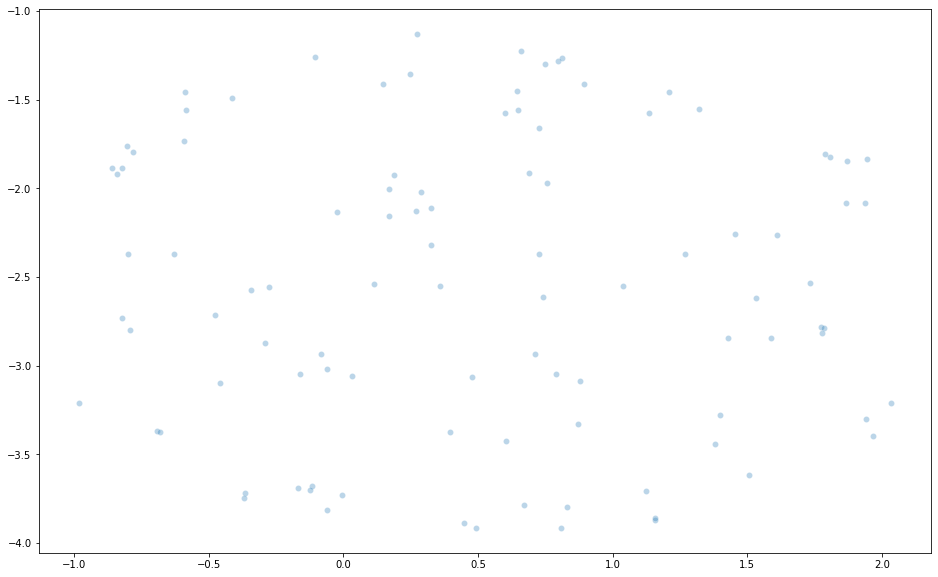

In [174]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    palette=sns.color_palette("hls", 10),
    legend="full",
    alpha=0.3
)

In [175]:
clustering.fit_predict(tsne_results)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [213]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors)
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

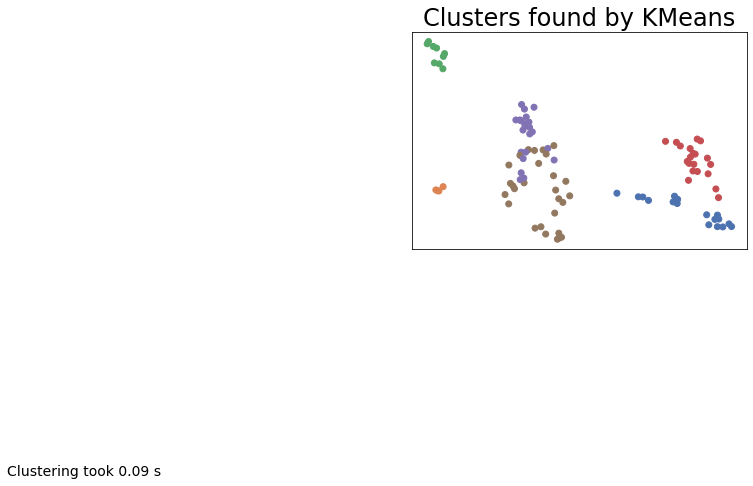

In [214]:
plot_clusters(umap_model.embedding_, cluster.KMeans, (), {'n_clusters':6})

c:\machine_learning\10k-emerging-risk-detection\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


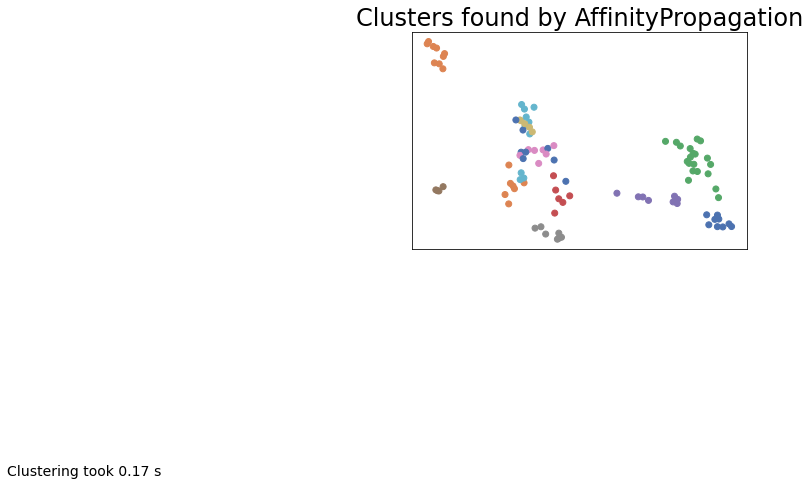

In [216]:
plot_clusters(umap_model.embedding_, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

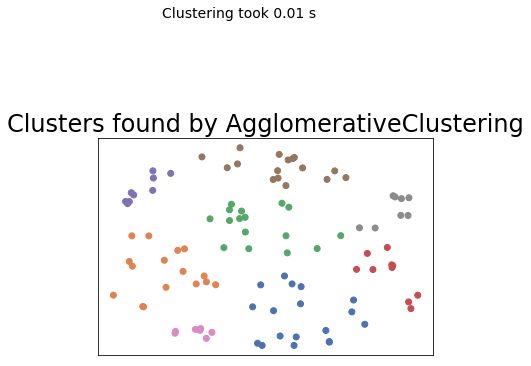

In [272]:
plot_clusters(tsne_results, cluster.AgglomerativeClustering, (), {'n_clusters':8, 'linkage':'ward'})

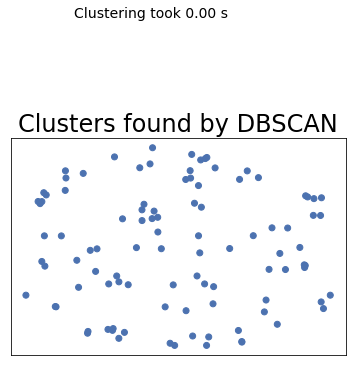

In [271]:
plot_clusters(tsne_results, cluster.DBSCAN, (), {})